# --------------Table of Contents----------------
## 1. Import libraries and data
## 2. Find the order frequency for each department

# -------------Questions---------------------

## 1. Import libraries and data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Path shortcut

path = r'/Users/lynnsey/Desktop/Bootcamp/Tasks/Immersion/Task 4/07-20-2023 Instacart Basket Analysis'

In [3]:
# Import data

all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged_V4.pkl'))

In [7]:
# Check data 

all.head()

,order_id,user_id,order_number,orders_day_of_week,time_ordered,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,marital_status,income,region,type_spender,age_group,age_range,parent,income_range,department_group,user_profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,married,40423,South,not low spender,middle aged,middle aged,parent,low,drinks,middle-aged parent
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,married,40423,South,not low spender,middle aged,middle aged,parent,low,drinks,middle-aged parent
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,married,40423,South,not low spender,middle aged,middle aged,parent,low,drinks,middle-aged parent
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,married,40423,South,not low spender,middle aged,middle aged,parent,low,drinks,middle-aged parent
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,married,40423,South,not low spender,middle aged,middle aged,parent,low,drinks,middle-aged parent


In [8]:
all.shape

(30964564, 37)

In [9]:
all['department_id'].value_counts(dropna = False)

4     9079273
16    5177182
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: department_id, dtype: int64

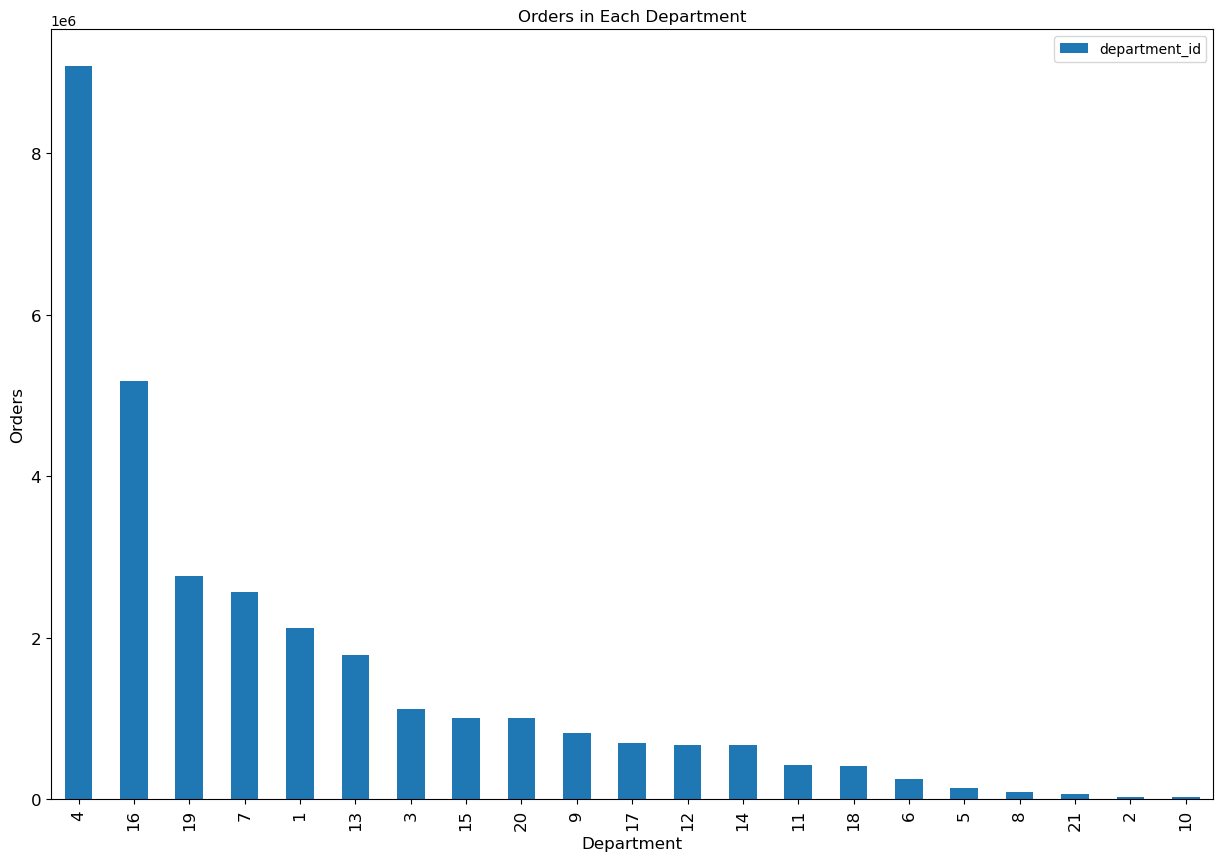

In [14]:
# Make a bar chart of the frequency of orders in each department

ax = all['department_id'].value_counts().plot(kind='bar', title ="Orders in Each Department", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Department", fontsize=12)
ax.set_ylabel("Orders", fontsize=12)
plt.show()

In [4]:
small = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'small_subset_all.pkl'))

In [4]:
# Create a sample of the population

# Create a list holding True/False values to the test np.random.rant() <+ 0.7

np.random.seed(4)
dev = np.random.rand(len(all)) <= 0.7

In [5]:
# Store 70% of the sample in the dataframe big

big = all[dev]

In [6]:
# Store 30% of the sample in the data frame small

small = all[~dev]

In [7]:
# Check numbers to see if they are correct

len(all)

30964564

In [8]:
len(big) + len(small)

30964564

In [4]:
# Take sample of just columns of interest

price_user = all[['prices', 'user_profile']]

Text(0.5, 1.0, 'Price of Items Ordered Based on User Profile')

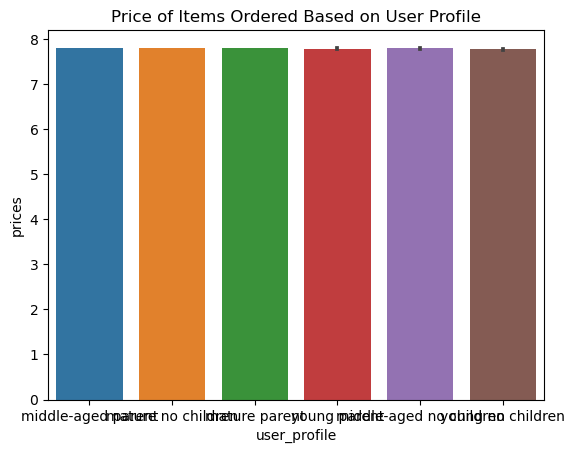

In [5]:
# Create bar chart

sns.barplot(x='user_profile', y='prices',data=price_user)
plt.title("Price of Items Ordered Based on User Profile")

In [7]:
all.groupby('user_profile').agg({'prices': ['mean']})

,prices
,mean
user_profile,
mature no children,7.800867
mature parent,7.794038
middle-aged no children,7.789119
middle-aged parent,7.789657
young no children,7.769843
young parent,7.784878
